PC：MacBook Pro (13-inch, 2016, Two Thunderbolt 3 ports)  
CPU：2 GHz Intel Core i5  
メモリ：8 GB 1867 MHz LPDDR3

In [1]:
import sys
print(sys.version)

3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


使用言語：Python3.6.1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

# 第1問
$$A_{1}=\begin{pmatrix} 1 & 0 & 0 \\ 0 & 5 & -1 \\ 0 & 3 & 0 \end{pmatrix},\quad
A_{2}=\begin{pmatrix} 1 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 3 & 0 \end{pmatrix}$$
$A_{1},A_{2}$にべき乗法を適用する。

初期解を$x_{0}=\begin{pmatrix} 1  \\ 1 \\ 1 \end{pmatrix}$、停止条件を$\epsilon=10^{-6}$とする。

In [3]:
A1 = np.array([[1,0,0],[0,5,-1],[0,3,0]])
A2 = np.array([[1,0,0],[0,0,-1],[0,3,0]])
x0 = np.array([[1],[1],[1]])
e = 10**(-6)

べき乗法の関数を定義する。
1. $x_{0}$を正規化する
2. $k=0$とする
3. $\lambda_{k}=\|Ax_{k}\cdot x_{k}\|$
4. $x_{k+1}=\Large\frac{Ax_{k}\cdot x_{k}}{\|Ax_{k}\cdot x_{k}\|}$と正規化する
5. $\lambda_{k}-\lambda_{k-1}< \epsilon$のとき終了
6. $k=k+1$として3.に戻る

3~6のループを最大1万回繰り返す。
戻り値として絶対値最大固有値の計算結果のリストを返す。

In [4]:
def power_method(A,x0,e):
    list_x = []
    list_x.append(x0/np.linalg.norm(x0))
    list_eigenvalue = []
    
    for i in range(10000):
        Ax = np.dot(A,list_x[i])
        list_eigenvalue.append (np.linalg.norm((np.dot(list_x[i].T, Ax))))
        list_x.append (Ax/np.linalg.norm(Ax))
        
        if i>=1 and np.linalg.norm(list_eigenvalue[i] - list_eigenvalue[i-1]) < e:
            break
    
    return list_eigenvalue

べき乗法の結果を表示する関数を定義する。  
1万回以内に収束するか否かで場合分け。

In [5]:
def result_power_method(power_method,A,x0,e):
    solutions = power_method(A,x0,e)
    print(f"{A}\nの固有値を、べき乗法で求める\n")
    
    if len(solutions) < 10000:
        print(f"{len(solutions)}回で収束")
        print("絶対値最大の固有値を示す解の推移は以下の通り")
        print(solutions)
        
    else:
        print("10000回反復しても収束せず")
        print("最初の20回の解の推移は以下の通り")
        print(solutions[:20])
        print("最後の10回の回の推移は以下の通り")
        print(solutions[-10:-1])

In [6]:
start = time.time()

result_power_method(power_method,A1,x0,e)

process_time = time.time() - start
print(f"\n実行時間{process_time}")

[[ 1  0  0]
 [ 0  5 -1]
 [ 0  3  0]]
の固有値を、べき乗法で求める

10回で収束
絶対値最大の固有値を示す解の推移は以下の通り
[2.6666666666666674, 4.0384615384615392, 4.2718894009216584, 4.2985752111965709, 4.3021397671911465, 4.3026750316858653, 4.302759466921068, 4.3027730245069584, 4.3027752146671423, 4.3027755691990368]

実行時間0.06465005874633789


$A_{1}$の絶対値最大の固有値は$$\lambda=\frac{1}{2}\left(5+\sqrt{13}\right)\fallingdotseq 4.302775637731995$$
より、べき乗法が真値に収束していることが分かる

In [7]:
start = time.time()

result_power_method(power_method,A2,x0,e)

process_time = time.time() - start
print(f"\n実行時間{process_time}")

[[ 1  0  0]
 [ 0  0 -1]
 [ 0  3  0]]
の固有値を、べき乗法で求める

10000回反復しても収束せず
最初の20回の解の推移は以下の通り
[1.0000000000000002, 0.45454545454545453, 0.99999999999999978, 0.58241758241758224, 0.99999999999999978, 0.5980271270036992, 1.0, 0.59978055136469621, 1.0, 0.59997561384523912, 0.99999999999999978, 0.59999729039053951, 0.99999999999999989, 0.59999969893182881, 1.0, 0.59999996654797538, 1.0, 0.59999999628310818, 0.99999999999999989, 0.59999999958701244]
最後の10回の回の推移は以下の通り
[1.0, 0.59999999999999987, 1.0, 0.59999999999999987, 1.0, 0.59999999999999987, 1.0, 0.59999999999999987, 1.0]

実行時間0.2702462673187256


$A_{1}$の固有値は$$\lambda_{1}=\sqrt{3}i,\quad\lambda_{2}=-\sqrt{3}i,\quad\lambda_{3}=1$$
であり、純虚数を固有値に持つため、絶対値最大の固有値が2つ存在し、べき乗法は収束しない。

しかし、偶数回目と奇数回目に分けて考察すると、1万回の反復の最後の方では、偶数回目で$1$、奇数回目で$0.6$に収束している。

$A$の固有値$\lambda _i$の正規化された固有ベクトルを$u_i$とする。  
$u_i$は互いに1次独立だから、初期ベクトル$x^\left( 0\right)$はこれらの1次結合  
$$x^\left( 0\right)=c_1 u_1+c_2 u_2 + c_3 u_3$$
と表される。したがって、$k$回反復により、
$$
\begin{eqnarray}
x^\left( k\right)&=&A^k x^\left( 0\right)\\
&=&c_1\lambda_1^k u_1+c_2\lambda_2^k u_2 +c_3\lambda_3^k u_3\\
&=&c_1\lambda_1^k\left\{u_1 + \frac{c_2}{c_1}\left(\frac{\lambda_2}{\lambda_1}\right) ^k u_2 + \frac{c_3}{c_1}\left(\frac{\lambda_3}{\lambda_1}\right) ^k u_2\right\}
\end{eqnarray}
$$
$\lambda_{1}=\sqrt{3}i,\:\lambda_{2}=-\sqrt{3}i,\:\lambda_{3}=1$より、$\displaystyle \lim_{k \to \infty} \left(\frac{\lambda_3}{\lambda_1}\right) ^k = 0,\: \frac{\lambda_2}{\lambda_1}=-1$であるから、となる。kが十分大のとき、
$$
\begin{eqnarray}
\frac{x^{\left\{ k\right\} T}x^{\left\{ k\right\} }}{x^{\left\{ k\right\} T}x^{\left\{ k-1\right\} }}&=&
\frac
    {
        \left\{
            c_{1}\lambda_{1}^{k}+
            \dfrac
                {c_{2}}
                {c_{1}}
            \left(
                \dfrac
                    {\lambda _{2}}
                    {\lambda _{1}}
            \right) ^{k}
        \right\}^2
    }
    {
        \left\{
            c_{1}\lambda_{1}^{k}+
            \dfrac
                {c_{2}}
                {c_{1}}
            \left(
                \dfrac
                    {\lambda _{2}}
                    {\lambda _{1}}
            \right) ^{k}
        \right\}
        \left\{
            c_{1}\lambda_{1}^{k-1}+
            \dfrac
                {c_{2}}
                {c_{1}}
            \left(
                \dfrac
                    {\lambda _{2}}
                    {\lambda _{1}}
            \right) ^{k-1}
        \right\}
    }\\
&=&
\frac
    {
        c_{1}\lambda_{1}^{k}+
            \dfrac
                {c_{2}}
                {c_{1}}
            \left(
                -1
            \right) ^{k}
    }
    {
            c_{1}\lambda_{1}^{k-1}+
            \dfrac
                {c_{2}}
                {c_{1}}
            \left(
                -1
            \right) ^{k-1}
    }
\end{eqnarray}
$$
であり、$k$が偶数のとき$1$、$k$が奇数のとき$\frac{3}{5}$である。  
未知数$3$個に対し、等式$2$本であるから、固有値を特定することはできない。

# 第2問

$N$次3重対角実対称正定値行列
$$A=\begin{pmatrix}
c & -1 &  &  & \\
-1 & c & -1 & & \\
& \ddots & \ddots & \ddots & \\
& & -1 & c & -1 \\
& & & -1 & c　
\end{pmatrix}$$
を係数行列とする線形方程式$Ax=b$を考える

## (1) 
$c=2$、および$c=20$のそれぞれの場合に対して、(i)CG法、(ii)Gauss-Seidel法、(iii)SOR法を適用し、残差$\| Ax-b\|$の収束の様子を観察する

係数行列の次元を$100$とする。  
反復法の反復回数を$5000$回とし、グラフにて(i)と(ii)を比較する。

In [8]:
dimension=100
steps=5000

$N$次3重対角実対称正定値行列$A$を生成する関数を定義する

In [9]:
def tridiagonal_matrix(dimension,c):
    diag0 = np.full(dimension,c)
    diag1= np.full(dimension-1, -1)
    
    a = np.diag(diag0, k=0) + np.diag(diag1, k=1) + np.diag(diag1, k=-1)
    
    return a

初期値$x_{0}$は、全ての要素が$1$のベクトルとする

In [10]:
def vector_x(dimension):
    x = np.ones(dimension)
    return x

In [11]:
vector_x(dimension)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

$b$は、各要素が$0$から$9$までの整数値をランダムにとるベクトルとする  
np.random.seed()により、乱数を固定する

In [12]:
def vector_b(dimension):
    np.random.seed(0)
    b = np.random.randint(0,10,dimension)
    
    return b

In [13]:
vector_b(dimension)

array([5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, 6, 7, 7, 8, 1, 5, 9, 8,
       9, 4, 3, 0, 3, 5, 0, 2, 3, 8, 1, 3, 3, 3, 7, 0, 1, 9, 9, 0, 4, 7, 3,
       2, 7, 2, 0, 0, 4, 5, 5, 6, 8, 4, 1, 4, 9, 8, 1, 1, 7, 9, 9, 3, 6, 7,
       2, 0, 3, 5, 9, 4, 4, 6, 4, 4, 3, 4, 4, 8, 4, 3, 7, 5, 5, 0, 1, 5, 9,
       3, 0, 5, 0, 1, 2, 4, 2])

### (i)
CG法を適用し、残差を戻り値とする関数を定義する

1. $r_{0}=b-Ax_{0}$
2. $p_{0}=r_{0}$
3. $k=0$
4. $\alpha_{k}=\Large\frac{r_{k}\cdot p_{k}}{p_{k}\cdot Ap_{k}}$
5. $x_{k+1}=x_{k}+\alpha_{k}p_{k}$
6. $r_{k+1}=r_{k}-\alpha_{k}Ap_{k}$
7. $\beta_{k}=-\Large\frac{ r_{k+1}\cdot Ap_{k}}{p_{k}\cdot Ap_{k}}$
8. $p_{k+1}=r_{k+1}+\beta_{k}p_{k}$
9. $k=k+1$として4.に戻る

4~9のループを$5000$回繰り返す。
戻り値として残差$\vec r$のリストを返す。  
（今回は、収束の速さに依らず$steps=5000$回反復するが、停止条件$\epsilon$を適用する関数に切り替えられるよう、引数にeを含んでいる。）

In [14]:
def cg_method_residual(A,x0,b,e,steps):
    r0 = b-np.dot(A,x0)
    p0 = r0
    
    list_x = []
    list_r = []
    list_p = []
    
    list_x.append(x0)
    list_r.append(r0)
    list_p.append(p0)
    
    for i in range(steps):
        Ap = np.dot(A, list_p[i])
        a = np.dot(list_r[i].T, list_p[i]) / np.dot(list_p[i].T, Ap)
        
        list_x.append(list_x[i] + np.dot(a, list_p[i]))
        list_r.append(list_r[i] - np.dot(a, Ap))
        
        #if np.linalg.norm(list_r[i+1]) < e:
            #break
        
        #else:
        b = (-1)*np.dot(list_r[i+1].T, Ap) / np.dot(list_p[i].T, Ap)

        list_p.append(list_r[i+1] + np.dot(b, list_p[i]))
            
    return list_r

cg_method_residual関数はベクトル$\vec r$のリストを戻り値としているため、これを$\|\vec r\|$のリストとする関数を定義する。  
（計算量が増えるのは百も承知だが、正規のアルゴリズムを実装することと、関数としての汎用性とを重視し、2つの関数を別々に定義している）

In [15]:
def cg_method_residual_norm(cg_method_residual,A,x0,b,e,steps):
    residual = cg_method_residual(A,x0,b,e,steps)
    
    list_residual_norm = []

    for i in range(len(residual)):
        list_residual_norm.append(np.linalg.norm(residual[i]))
        
    return list_residual_norm

### (ii)
Gauss-Seidel法を適用し、残差を戻り値とする関数を定義する

$A=D$（対角行列）$+L$（狭義下三角行列）$+U$（狭義上三角行列）
に分解

1. $r_{0}=Ax_{0}-b$
1. $k=0$とする
2. $x_{k+1}=-\left( D+L\right)^{-1}Ux_{k}+\left( D+L\right) ^{-1}b$
4. $r_{k+1}=Ax_{k+1}-b$
3. $k=k+1$として2に戻る

2~3のループを$steps=100$回繰り返す。
戻り値として$\vec r$のリストを返す。  
ただし、$\left( D+L \right)^{-1}$の逆行列の計算は、
$$x_{i}^{(k+1)}=-\left( A_{i,i}\right) ^{-1}\left( \sum_{j\leq i} A_{i,j}x_{j}^{(k+1)}+\sum_{j\geq i} A_{i,j}x_{j}^{(k)} -b_{i}\right)$$
として、要素ごとの積とシグマ和で実現する。

In [16]:
def gauss_seidel_method_residual(dimension,A,x0,b,e,steps):
    list_x=[]
    list_residual=[]
    list_x.append(x0)
    list_residual.append(np.dot(A, x0) - b)
    
    for k in range(steps):
        x_temp=list_x[k]
        for i in range(dimension):
            x_temp[i]=0
            for j in range(dimension): 
                if j!=i:
                    x_temp[i]-=A[i][j]*x_temp[j]
            x_temp[i]=(x_temp[i]+b[i])/A[i][i]

        list_x.append(x_temp)
        list_residual.append(np.dot(A, list_x[k]) - b)
        
        #if np.linalg.norm(list_residual[k+1]) < e:
            #break
    
    return list_residual

gauss_seidel_method_residual関数はベクトル$\vec r$のリストを戻り値としているため、これを$\|\vec r\|$のリストとする関数を定義する。

In [17]:
def gauss_seidel_method_residual_norm(gauss_seidel_method_residual,dimension,A,x0,b,e,steps):
    residual = gauss_seidel_method_residual(dimension,A,x0,b,e,steps)
    
    list_residual_norm = []

    for i in range(len(residual)):
        list_residual_norm.append(np.linalg.norm(residual[i]))
        
    return list_residual_norm

### (iii)
SOR法を適用し、残差を戻り値とする関数を定義する。  
SOR法は、Gauss-Seidel法において、解の更新時にパラメータ$\omega$を適用したものである。  
すなわち、
$$\begin{eqnarray}
y_{i}^{(k+1)}&=&-\left( A_{i,i}\right) ^{-1}\left( \sum_{j\leq i} A_{i,j}x_{j}^{(k+1)}+\sum_{j\geq i} A_{i,j}x_{j}^{(k)} -b_{i}\right)\\ 
x_{i}^{(k+1)}&=&x_{i}^{(k)}+\omega\left( y_{i}^{(k+1)}-x_{i}^{(k)}\right)
\end{eqnarray}$$
として、適切な$\omega$を定めることで、Gauss-Seidel法より高速に収束する。

In [18]:
def sor_method_residual(dimension,A,x0,b,e,steps,omega):
    list_x=[]
    list_residual=[]
    list_x.append(x0)
    list_residual.append(np.dot(A, x0) - b)
    
    for k in range(steps):
        x_temp=list_x[k]
        for i in range(dimension):
            x_sum=0
            for j in range(dimension): 
                if j!=i:
                    x_sum-=A[i][j]*x_temp[j]
            x_sum=(x_sum+b[i])/A[i][i]
            x_temp[i]=x_temp[i] + omega*(x_sum-x_temp[i])

        list_x.append(x_temp)
        list_residual.append(np.dot(A, list_x[k]) - b)
        
        #if np.linalg.norm(list_residual[k+1]) < e:
            #break
    
    return list_residual

sor_method_residual関数はベクトル$\vec r$のリストを戻り値としているため、これを$\|\vec r\|$のリストとする関数を定義する。

In [19]:
def sor_method_residual_norm(sor_method_residual,dimension,A,x0,b,e,steps,omega):
    residual = sor_method_residual(dimension,A,x0,b,e,steps,omega)
    
    list_residual_norm = []

    for i in range(len(residual)):
        list_residual_norm.append(np.linalg.norm(residual[i]))
        
    return list_residual_norm

(i)CG法・(ii)Gauss-Seidel法・(iii)SOR法の残差の推移をグラフにプロットして比較する

In [20]:
c=2
omega=1.62
print(f"c={c}のとき、SOR法のパラメータを{omega}とする")
start = time.time()
cg_c2 = cg_method_residual_norm (cg_method_residual, tridiagonal_matrix(dimension,c), vector_x(dimension), vector_b(dimension), e,steps)
process_time = time.time() - start
print(f"c={c}のとき、CG法の計算時間：{process_time}")

start = time.time()
gs_c2 = gauss_seidel_method_residual_norm (gauss_seidel_method_residual, dimension, tridiagonal_matrix(dimension,c), vector_x(dimension), vector_b(dimension), e,steps)
process_time = time.time() - start
print(f"c={c}のとき、Gauss-Seidel法の計算時間：{process_time}")

start = time.time()
sor_c2 = sor_method_residual_norm(sor_method_residual, dimension, tridiagonal_matrix(dimension,c), vector_x(dimension), vector_b(dimension), e, steps, omega)
process_time = time.time() - start
print(f"c={c}のとき、SOR法の計算時間：{process_time}")

c=2のとき、SOR法のパラメータを1.62とする


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


c=2のとき、CG法の計算時間：0.277008056640625
c=2のとき、Gauss-Seidel法の計算時間：107.40238404273987
c=2のとき、SOR法の計算時間：106.44029593467712


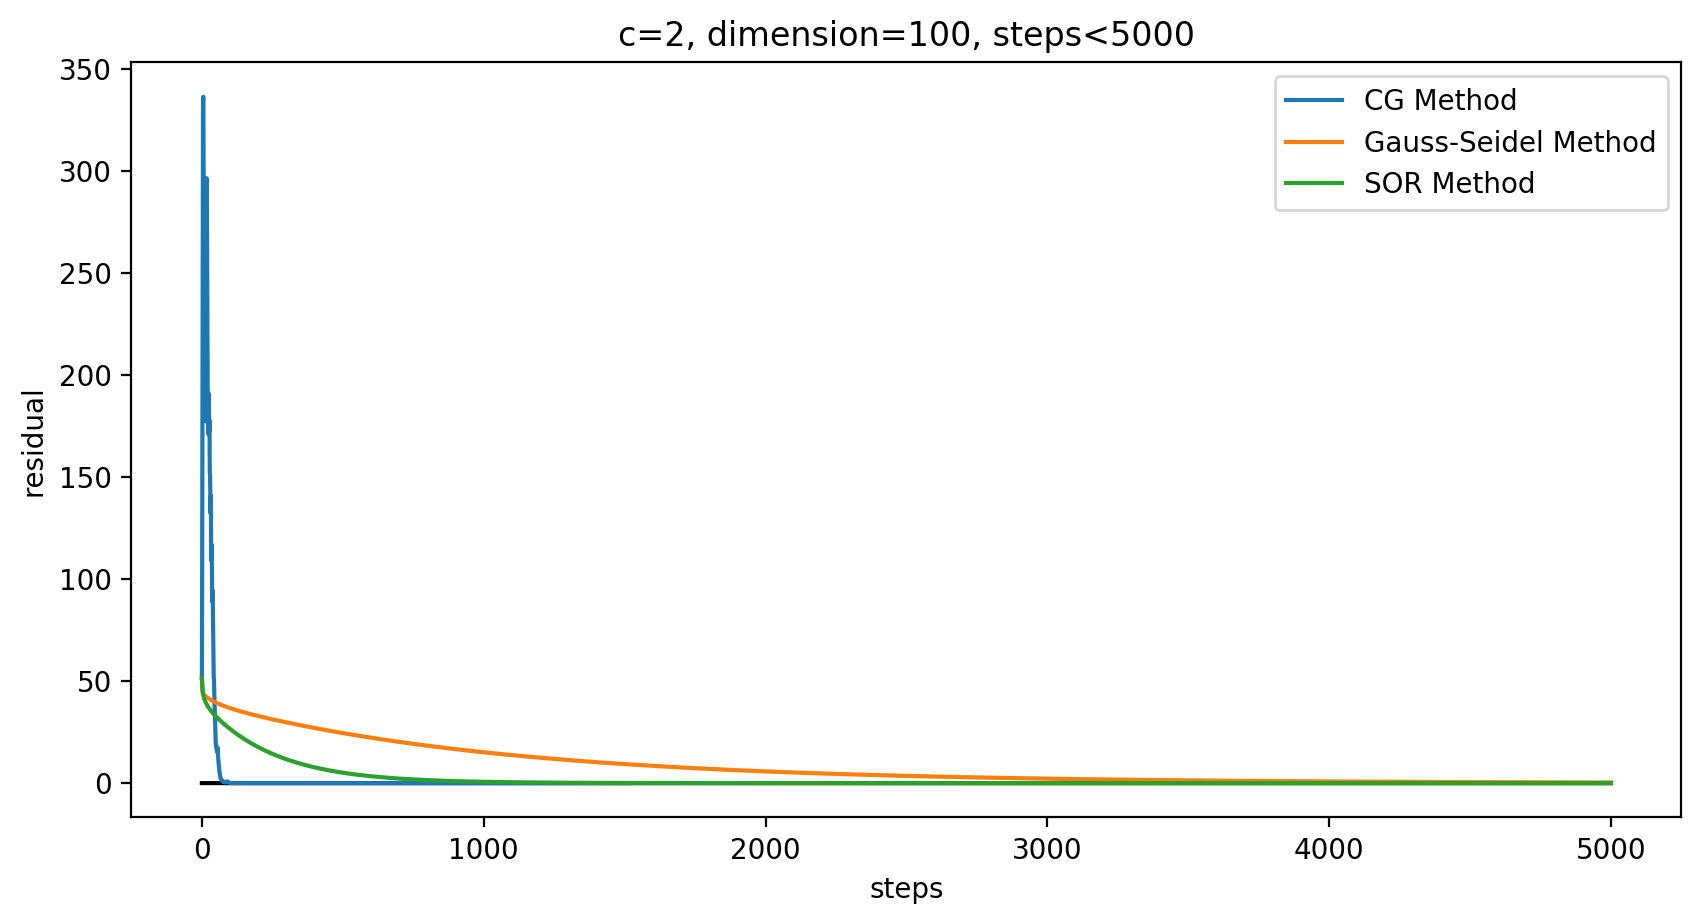

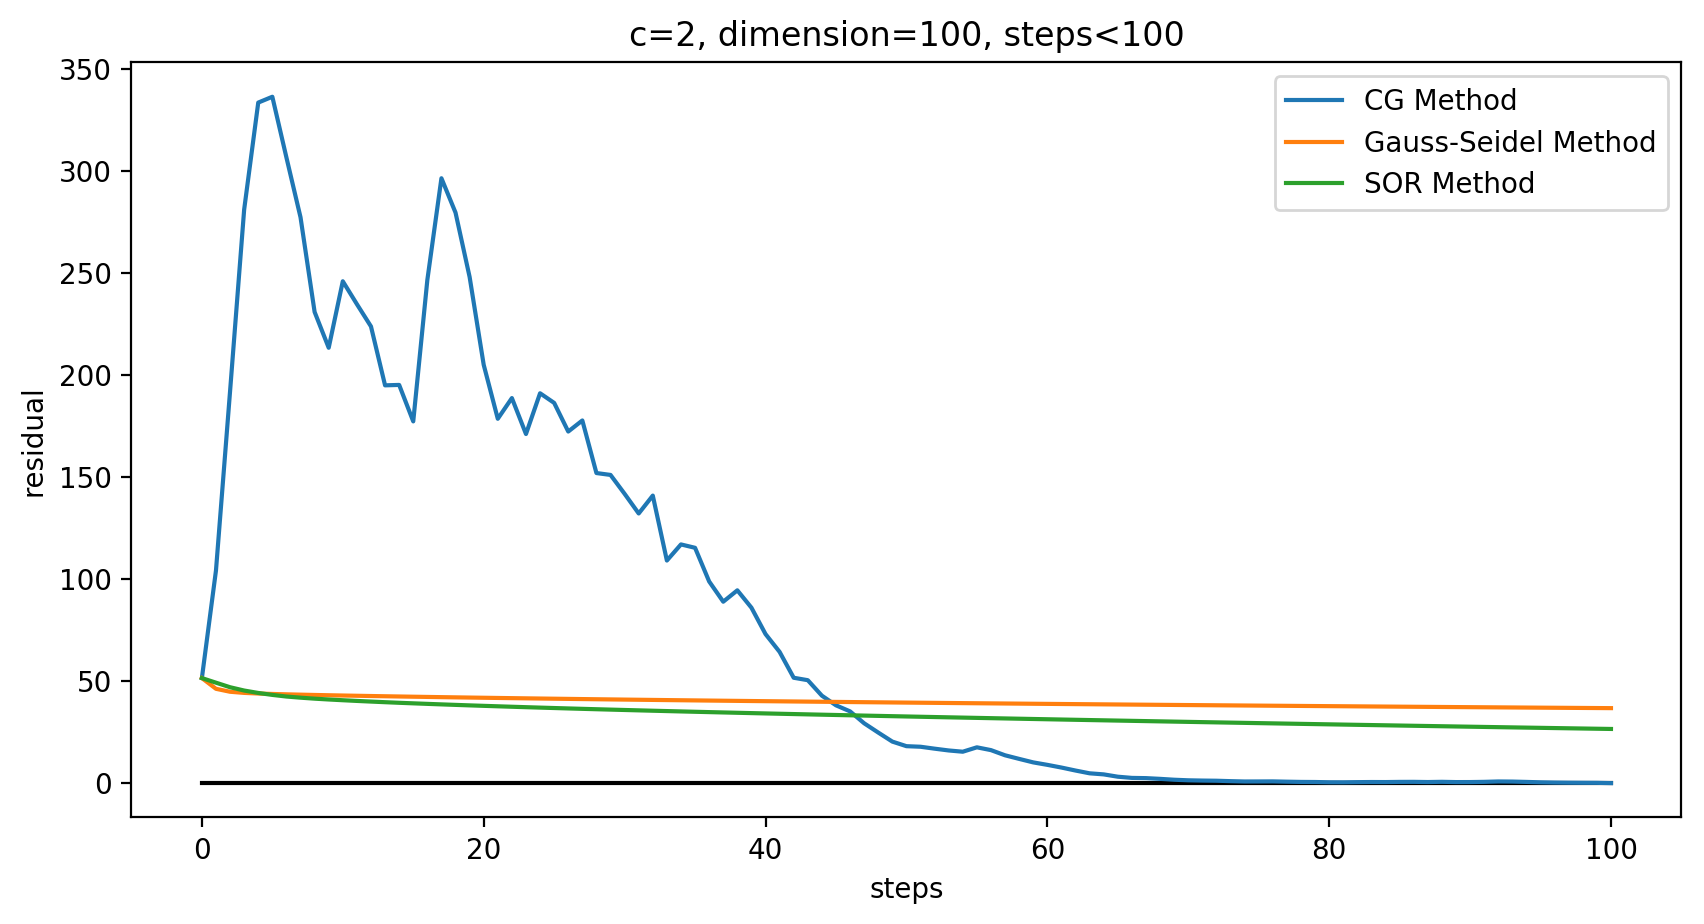

In [21]:
n = np.arange(steps+1)
fig = plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("steps")
plt.ylabel("residual")
plt.plot(n, np.zeros(steps+1), color="black")
p1, = plt.plot(n, cg_c2)
p2, = plt.plot(n, gs_c2)
p3, = plt.plot(n,sor_c2)
plt.legend([p1,p2,p3],["CG Method","Gauss-Seidel Method","SOR Method"])
plt.title(f"c={c}, dimension={dimension}, steps<{steps}")
plt.show()

n = np.arange(101)
fig = plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("steps")
plt.ylabel("residual")
plt.plot(n, np.zeros(101), color="black")
p1, = plt.plot(n, cg_c2[:101])
p2, = plt.plot(n, gs_c2[:101])
p3, = plt.plot(n,sor_c2[:101])
plt.legend([p1,p2,p3],["CG Method","Gauss-Seidel Method","SOR Method"])
plt.title(f"c={c}, dimension={dimension}, steps<100")
plt.show()

In [22]:
c=20
omega=1.05
print(f"c={c}のとき、SOR法のパラメータを{omega}とする")
start = time.time()
cg_c20 = cg_method_residual_norm (cg_method_residual, tridiagonal_matrix(dimension,c), vector_x(dimension), vector_b(dimension), e,steps)
process_time = time.time() - start
print(f"c={c}のとき、CG法の計算時間：{process_time}")

start = time.time()
gs_c20 = gauss_seidel_method_residual_norm (gauss_seidel_method_residual, dimension, tridiagonal_matrix(dimension,c), vector_x(dimension), vector_b(dimension), e,steps)
process_time = time.time() - start
print(f"c={c}のとき、Gauss-Seidel法の計算時間：{process_time}")

start = time.time()
sor_c20 = sor_method_residual_norm(sor_method_residual, dimension, tridiagonal_matrix(dimension,c), vector_x(dimension), vector_b(dimension), e, steps, omega)
process_time = time.time() - start
print(f"c={c}のとき、SOR法の計算時間：{process_time}")

c=20のとき、SOR法のパラメータを1.05とする


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


c=20のとき、CG法の計算時間：0.25800204277038574
c=20のとき、Gauss-Seidel法の計算時間：118.64144015312195
c=20のとき、SOR法の計算時間：107.42112922668457


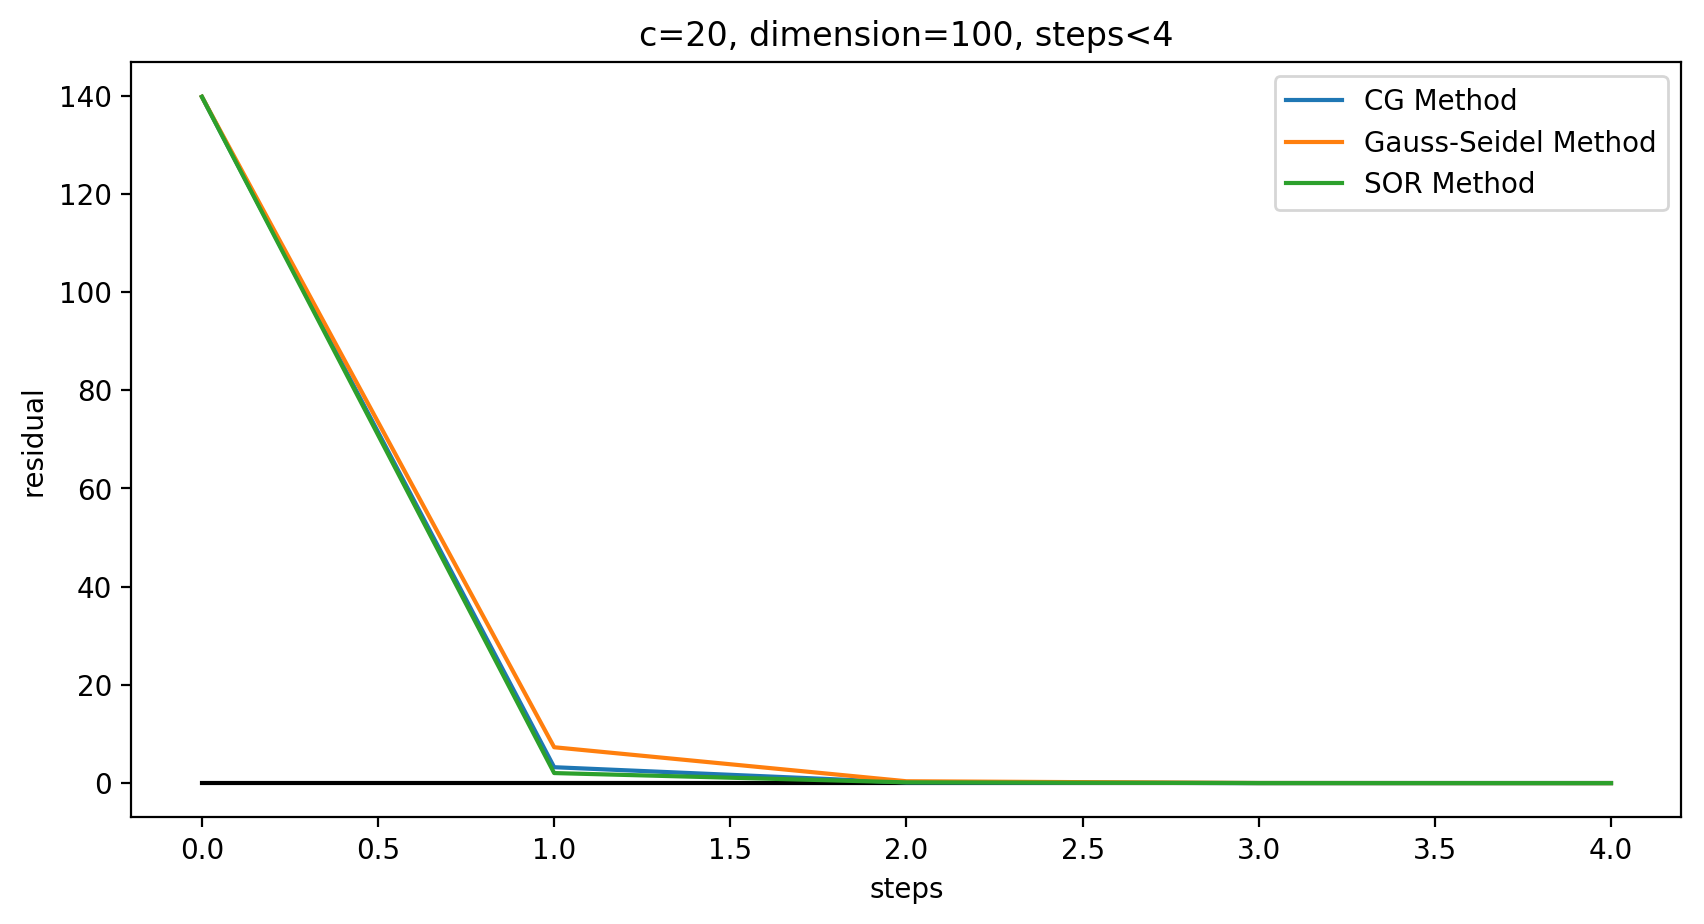

In [23]:
k=5
n = np.arange(k)
fig = plt.figure(figsize=(10,5),dpi=200)
plt.xlabel("steps")
plt.ylabel("residual")
plt.plot(n, np.zeros(k), color="black")
p1, = plt.plot(n, cg_c20[:k])
p2, = plt.plot(n, gs_c20[:k])
p3, = plt.plot(n,sor_c20[:k])
plt.legend([p1,p2,p3],["CG Method","Gauss-Seidel Method","SOR Method"])
plt.title(f"c={c}, dimension={dimension}, steps<{k-1}")
plt.show()

$c=20$のとき、CG法とGauss-Seidel法は、CG法がわずかに速いものの、共に$3$回ほどで収束している。  
一方、$c=2$のとき、CG法は$70$回ほどで収束しているが、Gauss-Seidel法は収束に約$5000$回の反復が必要となる。

## (2)
### (i)条件数による考察
$c=2$の場合と、$c=20$の場合の、係数行列$A$の条件数を調べる。

In [24]:
def cond2(A):
    cond=np.linalg.norm(A,2)*np.linalg.norm(np.linalg.inv(A),2)
    return cond

In [25]:
A_c2=tridiagonal_matrix(dimension,2)
cond2(A_c2)

4133.642926801107

In [26]:
A_c20=tridiagonal_matrix(dimension,20)
cond2(A_c20)

1.2221027921700447

$c=20$のとき、$A$の条件数は、$cond_{2}\left( A\right)\fallingdotseq 1.22$であるのに対し、  
$c=2$のときは、$cond_{2}\left( A\right)\fallingdotseq 4130$と非常に大きい。

条件数の影響は、以下の定理に示される。
***
正則行列$A$に関する線形連立1次方程式$Ax=b$に対して、その解法に依らず、
$$\begin{eqnarray}
\dfrac {\left\| x\left(\epsilon\right) -x\right\| }{\left\| x\right\| }
\leq
cond_{2}\left( A\right)
\left(\dfrac{\epsilon\left\| f\right\|}{\left\| b\right\|} + \dfrac{\epsilon \left\| F\right\|}{\left\| A\right\|}\right)
\tag{2.1}
\end{eqnarray}
$$
が成立する。
***
>これは、計算機上では、線形1次連立方程式$Ax=b$が
$$\begin{eqnarray}
\left( A+\epsilon F\right) \left( x\left(\epsilon\right)\right) =b+\epsilon f
\tag{2.2}
\end{eqnarray}$$
として計算されることに由来する。

>$\epsilon$の関数である$x\left(\epsilon\right)$をTaylor展開。
$$
\begin{eqnarray}
x\left( \epsilon \right) = x\left( 0 \right)+ \dot x\left( 0 \right)\epsilon + \mathcal O \left(\epsilon^{2}\right)
\tag{2.3}
\end{eqnarray}$$

>ここで、$(2.2)$の両辺を$\epsilon$で微分する。
$$\begin{eqnarray}
Fx\left(\epsilon\right) + \left(A + \epsilon F\right) \dot x\left(\epsilon\right) = f
\tag{2.4}
\end{eqnarray}$$

>$(2.4)$に$\epsilon =0$を代入する。
$$\begin{eqnarray}
Fx\left(0\right) + A \dot x\left(0\right) &=& f \\
\dot x\left(0\right) &=& A^{-1}\left( f-Fx\left(0\right) \right)
\tag{2.5}
\end{eqnarray}$$

>$(2.5)$を$(2.3)$に代入する。
$$
\begin{eqnarray}
x\left( \epsilon \right) = 
x\left( 0 \right)+
\left[ A^{-1}
    \left\{ f-Fx
        \left(0
        \right)
    \right\}
\right]\epsilon +
\mathcal O \left(\epsilon^{2}\right)
\tag{2.6}
\end{eqnarray}$$

>このとき、誤差は以下のように表され、$(2.1)$式が示される。
$$
\begin{eqnarray}
\dfrac {\left\| x\left(\epsilon\right) -x\right\| }{\left\| x\right\| } &=& \dfrac {\left\| \epsilon A^{-1}\left\{ f-Fx\left(0\right)\right\} \right\| }{\left\| x\right\| }+\mathcal O \left(\epsilon^{2}\right) \\
&\leq&
\epsilon\left\| A^{-1}\right\| \left(\dfrac{\left\| f\right\|}{\left\| x\right\|} + \left\| F\right\|\right) \\
&=&
\epsilon\left\| A\right\|\left\| A^{-1}\right\| \left(\dfrac{\left\| f\right\|}{\left\| A\right\|\left\| x\right\|} + \dfrac{\left\| F\right\|}{\left\| A\right\|}\right)
\tag{2.7}
\end{eqnarray}$$

>ここで、三角不等式
$$\begin{eqnarray}
Ax=b 
\Longrightarrow \left\| A\right\|\left\| x\right\| \geq \left\| b\right\|
\end{eqnarray}$$
より、$(2.7)$式は以下のように変形される。
$$\begin{eqnarray}
\dfrac {\left\| x\left(\epsilon\right) -x\right\| }{\left\| x\right\| }
&\leq&
\left\| A\right\|\left\| A^{-1}\right\|
\left(\dfrac{\epsilon\left\| f\right\|}{\left\| b\right\|} + \dfrac{\epsilon \left\| F\right\|}{\left\| A\right\|}\right) \\
&=&
cond_{2}\left( A\right)
\left(\dfrac{\epsilon\left\| f\right\|}{\left\| b\right\|} + \dfrac{\epsilon \left\| F\right\|}{\left\| A\right\|}\right)
\tag{2.1}
\end{eqnarray}$$

上記の定理は、数値計算による誤差を定量的に示すものではないが、その最大値を与える。  
$c=2$のときの条件数は、$c=20$のときの条件数に対し、$10^{2}$のオーダーで大きい。  
そのため、誤差も1反復で最大で$10^{2}$のオーダーでより大きく広がってしまうため、反復法で真の解に到達する速さが遅くなる。

### (ii)スペクトル半径による考察
(ii)Gauss-Seidel法・(iii)SOR法の収束の速さは、スペクトル半径の大きさによる。  
このことを示し、実際にスペクトル半径を比較する。

$n$次元ユークリッド空間は完備であるから、その任意のCauchy列は収束する。  
よって、縮小写像
$$0<^{\exists}q < 1\quad\left\| \phi \left( x \right)-\phi\left( y\right) \right\| \leq q\left\| x-y\right\|$$
において、点列$\{ x^{\left(k\right)} \}$は、不動点に収束する。


(ii)Gauss-Seidel法・(iii)SOR法のスキームは、それぞれ、  
$$\begin{eqnarray}
x^\left( k+1\right) &=& \left( D+L\right) ^{-1} U x^\left( k\right) +\left( D+L \right) b \\
x^\left( k+1\right) &=& \left( D+\omega L \right) ^{-1}\left\{ \left( 1-\omega\right) D-\omega U\right\} x^\left( k\right) + \omega\left( D +\omega U\right) ^{-1} b
\end{eqnarray}$$
である。このとき、
$$\begin{eqnarray}
\rho\left[\left( D+L\right) ^{-1} U\right]　&<& 1\\
\rho\left[\left( D+\omega L \right) ^{-1}\left\{ \left( 1-\omega\right) D-\omega U\right\}\right] &<& 1
\end{eqnarray}$$
であれば、縮小写像の原理により、不動点に収束する。


これにより、縮小写像である(ii)Gauss-Seidel法・(iii)SOR法の収束が保証されている。

正方行列のスペクトル半径は、各固有値$\lambda_{i}$に対し、
$$\rho\left( A\right) =\max _{i}\left( \left| \lambda _{i}\right| \right)$$
である。

(ii)Gauss-Seidel法につき、スペクトル半径をそれぞれ計算する。スキームは、
$$x^\left(k+1\right) = \left( D+L \right)^{-1}U x^\left(k\right)+\left( D+L \right)b$$
であるから、$\left( D+L \right)^{-1}U$のスペクトル半径を考える。

In [27]:
def spectral_radius(A):
    la, v = np.linalg.eig(A)
    x = np.linalg.norm(max(max(la),-min(la)))
    return x

In [28]:
D = np.diag(np.diag(A_c2, k=0), k=0)
L = np.diag(np.diag(A_c2, k=-1), k=-1)
U = np.diag(np.diag(A_c2, k=1), k=1)
spectral_radius(np.dot(np.linalg.inv(D+L),U))

0.99903279856679772

In [29]:
D = np.diag(np.diag(A_c20, k=0), k=0)
L = np.diag(np.diag(A_c20, k=-1), k=-1)
U = np.diag(np.diag(A_c20, k=1), k=1)
spectral_radius(np.dot(np.linalg.inv(D+L),U))

0.0099903309235167478

$c=2$のとき、$\rho\{\left( D+L \right)^{-1}U\}\fallingdotseq 0.999$  
$c=20$のとき、$\rho\{\left( D+L \right)^{-1}U\}\fallingdotseq 0.010$  
すなわち、$c=2$のときのスペクトル半径はほぼ$1$であり、不動点への収束が極めて遅く、  
実際に$c=2$のときの収束の速さは、$c=20$のときに比べて、$10^2$に近いオーダーでど遅くなっていくことがわかる。

### (iii)CG法の収束性による考察

$A$の$2$ノルムに関する条件数$\kappa = cond_2 \left(A\right)$に対し、CG法の数値解は、真の解を$x^\ast$とすると、
$$\begin{eqnarray}
\phi\left( x\right) &=& \frac{1}{2}\left( x-x^\ast , A\left( x-x^\ast \right)\right) \\
\phi\left( x^\left( k+1\right) \right) &\leq& 4 \left( \frac{\sqrt{\kappa} -1}{\sqrt{\kappa} +1} \right) ^{2k} \phi \left( x^\left( 0\right) \right)
\end{eqnarray}$$
を満たす。

$c$の値による、誤差の関数$\phi\left( x\right)$のとりうる最大値の変化は、
$$4 \left( \frac{\sqrt{\kappa} -1}{\sqrt{\kappa} +1} \right)$$
の値によって比較できる。

In [30]:
kappa = cond2(A_c2)
print(4*((kappa**0.5 - 1)/(kappa**0.5 + 1)))

3.8774761548


In [31]:
kappa = cond2(A_c20)
print(4*((kappa**0.5 - 1)/(kappa**0.5 + 1)))

0.200405040874


$c=2$のとき、$4 \left( \frac{\sqrt{\kappa} -1}{\sqrt{\kappa} +1} \right)\fallingdotseq 3.88$  
$c=20$のとき、$4 \left( \frac{\sqrt{\kappa} -1}{\sqrt{\kappa} +1} \right)\fallingdotseq 0.20$

すなわち、$4 \left( \frac{\sqrt{\kappa} -1}{\sqrt{\kappa} +1} \right) ^{2k}$は、  
$c=2$のとき増加関数、$c=20$のとき減少関数となる。  
したがって、  
$c=2$のとき、誤差の関数の最大値は、反復を繰り返す度に増加し、収束が遅くなりうる。  
（実際にグラフを見ると、残差が増加している部分が存在する。）  
一方、$c=20$のとき、誤差の関数の最大値は、反復を繰り返す度に減少し、収束が速い。 